# Reproducing Figure 2A-D

Figure 2 presents results from sensitivity analysis of configuration 1.

## Parameters

In these figures, we vary:

* **Number of outpatients per day**:
    * 170 (same as config 4)
    * 85
    * 65
* **Average service time for outpatients** - mean (SD):
    * 0.87 (0.21) (same as config 1)
    * 2.5 (0.5)
    * 5 (1)

To calculate inter-arrival times from those numbers per day, based on article description and the provided patient counts and equivalent IAT, understand the method for calculation to be **round(60/(n/8.5))**,  where n is the number of arrivals per day. As such...

In [1]:
# Calculation of inter-arrival times
print(f'For 170 outpatients, use IAT (rounded to nearest int): {60/(170/8.5)}')
print(f'For 85 outpatients, use IAT (rounded to nearest int): {60/(85/8.5)}')
print(f'For 65 outpatients, use IAT (rounded to nearest int): {60/(65/8.5)}')

For 170 outpatients, use IAT (rounded to nearest int): 3.0
For 85 outpatients, use IAT (rounded to nearest int): 6.0
For 65 outpatients, use IAT (rounded to nearest int): 7.846153846153846


## Set up

In [2]:
# To run model
import PHC

# To import results and produce figures
import xlrd
import pandas as pd
import os
import matplotlib.pyplot as plt

# To speed up run time
from multiprocessing import Pool

'''
# Additional package to record runtime of this notebook
import time
start = time.time()
'''

'\n# Additional package to record runtime of this notebook\nimport time\nstart = time.time()\n'

In [3]:
# Paths to save image files to
output_folder = 'outputs'
fig2a_path = os.path.join(output_folder, 'fig2a.png')
fig2b_path = os.path.join(output_folder, 'fig2b.png')
fig2c_path = os.path.join(output_folder, 'fig2c.png')
fig2d_path = os.path.join(output_folder, 'fig2d.png')

## Run model

As this is a variation on configuration 1 (which is the default parameters in PHC.py), we just need to input the varying number of outpatients and service time.

In [4]:
# TODO: Run with 100 replications

# Varying number of outpatients
arr_dict = [
    {
        'OPD_iat': 3,
        'rep_file': 'arr170'
    },
    {
        'OPD_iat': 6,
        'rep_file': 'arr85',
    },
    {
        'OPD_iat': 8,
        'rep_file': 'arr65',
    }
]

# Varying service time
serv_dict = [
    {
        'mean': 0.87,
        'sd': 0.21,
        'consult_boundary_1': 0.5,  # From PHC.py
        'consult_boundary_2': 0.3,  # From PHC.py
        'rep_file': 'serv087'
    },
    {
        'mean': 2.5,
        'sd': 0.5,
        'consult_boundary_1': 1,  # Guess
        'consult_boundary_2': 1,  # Guess
        'rep_file': 'serv25'
    },
    {
        'mean': 5,
        'sd': 1,
        'consult_boundary_1': 2,  # From config 4
        'consult_boundary_2': 2,  # From config 4
        'rep_file': 'serv5'
    }
]

Create each combination for the reproduction

In [5]:
dict_list = []
for arr in arr_dict:
    for serv in serv_dict:
        # Combine the dictionaries
        comb = {**arr, **serv}
        # Replace the file name
        comb['rep_file'] = f'''f2_{arr['rep_file']}_{serv['rep_file']}.xls'''
        # Save to list
        dict_list.append(comb)

len(dict_list)

9

In [6]:
# Append 's_' to all items
for i, d in enumerate(dict_list):
    dict_list[i] = {f's_{k}': v for k, v in d.items()}

# Preview example
dict_list[0]

{'s_OPD_iat': 3,
 's_rep_file': 'f2_arr170_serv087.xls',
 's_mean': 0.87,
 's_sd': 0.21,
 's_consult_boundary_1': 0.5,
 's_consult_boundary_2': 0.3}

Run the model (with parallel processing to reduce run time)

In [7]:
'''
# Wrapper function to allow input of dictionary with pool
def wrapper(d):
    return PHC.main(**d)

# Create a process pool that uses all CPUs
with Pool() as pool:
    # Run PHC.main() using each of inputs from config
    pool.map(wrapper, dict_list)
'''

'\n# Wrapper function to allow input of dictionary with pool\ndef wrapper(d):\n    return PHC.main(**d)\n\n# Create a process pool that uses all CPUs\nwith Pool() as pool:\n    # Run PHC.main() using each of inputs from config\n    pool.map(wrapper, dict_list)\n'

## Create Figure 2B

Import and process data

In [8]:
# List of files to loop through
files = ['f2_arr170_serv087', 'f2_arr85_serv087', 'f2_arr65_serv087']

# Empty list to store results
result_list = []

for f in files:
    # Import .xls and convert to pandas dataframe
    book = xlrd.open_workbook(os.path.join(output_folder, f'{f}.xls'))
    result = pd.read_excel(book, header=None, index_col=0)

    # Find mean from the replication
    # Save as dataframe, dropping the duplicate rows (NCD occ twice)
    res = pd.DataFrame({
        f.replace('arr', ''): result.mean(axis=1)
    }).drop_duplicates()

    # Remove index name
    res.index.name = None

    # Save to list
    result_list.append(res)

# Combine into single dataframe
summary = pd.concat(result_list, axis=1)

Produce figure

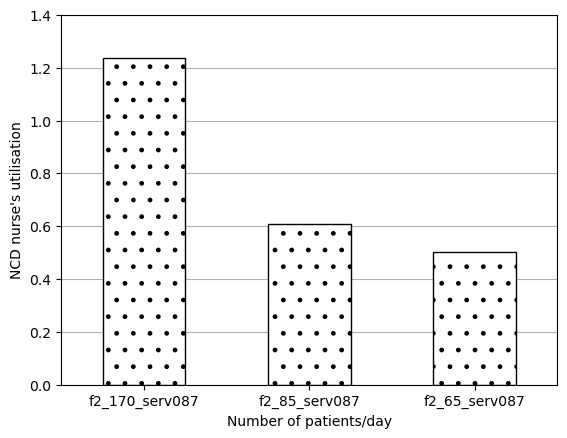

In [9]:
ax = summary.loc['NCD occ'].plot.bar(edgecolor='black', color='white', hatch='.')
plt.xlabel('Number of patients/day')
plt.ylabel('''NCD nurse's utilisation''')
plt.ylim(0, 1.4)
plt.xticks(rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.savefig(fig2b_path, bbox_inches='tight')
plt.show()

## Create Figure 2C

Import and process data

In [10]:
# List of files to loop through
files = ['f2_arr170_serv5', 'f2_arr85_serv5', 'f2_arr65_serv5']

# Empty list to store results
result_list = []

for f in files:
    # Import .xls and convert to pandas dataframe
    book = xlrd.open_workbook(os.path.join(output_folder, f'{f}.xls'))
    result = pd.read_excel(book, header=None, index_col=0)

    # Find mean from the replication
    # Save as dataframe, dropping the duplicate rows (NCD occ twice)
    res = pd.DataFrame({
        f.replace('arr', '').replace('_serv5', ''): result.mean(axis=1)
    }).drop_duplicates()

    # Remove index name
    res.index.name = None

    # Save to list
    result_list.append(res)

# Combine into single dataframe
summary = pd.concat(result_list, axis=1)

Produce figure

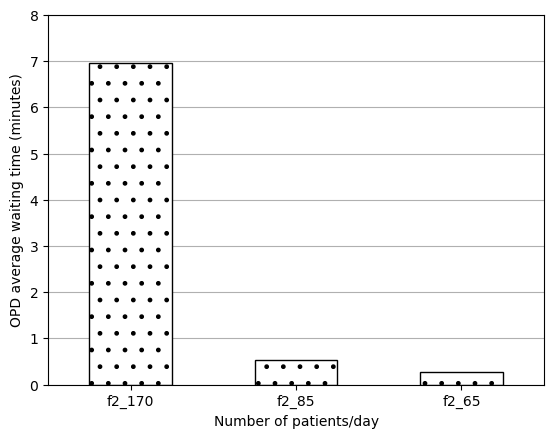

In [11]:
# Create figure
ax = summary.loc['OPD Q wt'].plot.bar(edgecolor='black', color='white', hatch='.')
plt.xlabel('Number of patients/day')
plt.ylabel('''OPD average waiting time (minutes)''')
plt.xticks(rotation=0)
plt.ylim(0, 8)
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.savefig(fig2c_path, bbox_inches='tight')
plt.show()

In [12]:
'''
# Find run time in seconds
end = time.time()
runtime = round(end-start)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime//60}m {runtime%60}s')
'''

"\n# Find run time in seconds\nend = time.time()\nruntime = round(end-start)\n\n# Display converted to minutes and seconds\nprint(f'Notebook run time: {runtime//60}m {runtime%60}s')\n"